# Predicting-Obesity-Rate-Based-on-Food-Atlas

## 1.Data collecting and EDA

## Contents
- [Import Packages](#Import-Packages)
- [Problem Statement](#Problem-Statement)
- [Outside Research](#Outside-Research)
- [Executive Summary](#Executive-Summary)
- [EDA](#EDA)
    - [Merging The dataset](#Merging-The-Dataset)
    - [Cleaning The Merged Dataset](#Cleaning-The-Merged-Dataset)

## Import Packages 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

## Problem Statement

More than one-third of adults and 18.5% of children are obese. Increasing the access to healthy foods have been in the forefront of policymakers agenda in order to address this worldwide problem. What are some of the main reasons for high obesity rate and what ways we can fix this? This in the main question we are seeking to answer in this analysis specifically looking at whether the number of food stores and the availability of local produce in each state can predict the obesity rate. We combined data on food environments from the United States Department of Agriculture in order to analyze the relationships between a person's food environment and the obesity rate of the state. The data set consists of the availability of the number of grocery stores, convenience stores, and full-service and the access to local produce.

## Outside Research 

A food atlas or a “food desert” is an area with limited access to affordable and healthy food. It hard for Americans to eat a healthy diet when they don’t have access to healthy food, and this is a main reason why we still have high obesity rates in many parts of the country. The rate of diabetes among Americans has more than double.  The increases of supermarkets that are a half a mile distance from households have resulted in a lower BMI. A person’s food environment can greatly affect obesity rates in the U.S.  People living in low-income neighborhoods have poorer health and higher rates of obesity. The distance to restaurants, fast food restaurants and grocery stores can impact your eating choices. We seeks to show how your food environment can help determine obesity rates for each county in all fifty states of the U.S. We believe that the number of unhealthy food option will cause an increase the obesity levels in the county. Counties with access to healthier food choices will have a negative correlation with obesity rates. 


Obesity is still a major problem in the United States. Although, we have a better understanding on what is considered a healthy diet, many Americans don’t have access to affordable and healthy food. Americans are also choosing not to follow a healthy lifestyle because of the increased price of the food items. Lower-income households are relying more on “empty calorie” food that are readily available at convenience stores and fast food restaurants . The U.S. Office of Agriculture found that 2.3 million people live more than a mile from the grocery store and don’t own a car. It is also difficult for large supermarkets to find enough space to build their store in urban areas. As a result, the creation of more supermarkets and grocery stores are seen as undesirable. In more rural areas, people lack pubic transportation and the number of grocery stores is growing at a much smaller rate as compared to the rate of fast food restaurants. Philadelphia had the second lowest number of supermarkets among other U.S. major cities and lower income neighborhood at thirty percent less food stores than higher income neighborhooh. The emergence of food deserts came with more upper class households leaving the cities to go to the suburban areas. Studies have found that obesity stems from unhealthy eating habits. Americans have limited access to adequate food and people are at risk for food insecurity and obesity. The U.S. has one of the highest rates in food insecurity when compared to other countries. In order to combat obesity, we need to make is a priority that everyone has equal access to affordable and healthier food choices. A healthy food environment refers to having easy access to supermarkets, farmers markets and convenience stores.

## EDA

The Food Environment Atlas has over 275 variables, including new indicators on access and proximity to a grocery store for sub populations; an indicator on the SNAP Combined Application Project for recipients of Supplemental Security Income (at the State level); and indicators on farmers' markets that report direct selling of the produce. 

[Data Dictionary ](https://www.ers.usda.gov/webdocs/DataFiles/80526/archived_documentation_August2015.pdf?v=0)

In [2]:
fastfood = pd.read_csv('../Data/FastFoodRestaurants.csv')

In [3]:
fastfood.head()

,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [4]:
fastfood.rename(columns = {'province' : 'State'}, inplace=True)
fastfood.head()

,address,city,country,keys,latitude,longitude,name,postalCode,State,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [5]:
fastfood.isnull().sum()

address         0
city            0
country         0
keys            0
latitude        0
longitude       0
name            0
postalCode      0
State           0
websites      465
dtype: int64

In [6]:
fastfood.drop(columns='websites', inplace = True)

In [7]:
health = pd.read_excel('../Data/DataDownloadfull.xls',sheet_name='HEALTH')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 14 columns):
FIPS                     3143 non-null int64
State                    3143 non-null object
County                   3143 non-null object
PCT_DIABETES_ADULTS08    3138 non-null float64
PCT_DIABETES_ADULTS13    3142 non-null float64
PCT_OBESE_ADULTS08       3138 non-null float64
PCT_OBESE_ADULTS13       3142 non-null float64
PCT_HSPA15               2025 non-null float64
RECFAC09                 3143 non-null int64
RECFAC14                 3143 non-null int64
PCH_RECFAC_09_14         3020 non-null float64
RECFACPTH09              3143 non-null float64
RECFACPTH14              3143 non-null float64
PCH_RECFACPTH_09_14      3020 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 343.9+ KB


PCT_obese_adults13 should be the y values on train that we are predicting

In [8]:
health.isnull().sum()

FIPS                        0
State                       0
County                      0
PCT_DIABETES_ADULTS08       5
PCT_DIABETES_ADULTS13       1
PCT_OBESE_ADULTS08          5
PCT_OBESE_ADULTS13          1
PCT_HSPA15               1118
RECFAC09                    0
RECFAC14                    0
PCH_RECFAC_09_14          123
RECFACPTH09                 0
RECFACPTH14                 0
PCH_RECFACPTH_09_14       123
dtype: int64

We will drop PCT_HSPA15, PCH_RECFAC_09_14, and PCH_RECFACPTH_09_14 More focused on the pct of obese adults.

In [9]:
health.drop(columns=['PCT_HSPA15', 'PCH_RECFAC_09_14','PCH_RECFACPTH_09_14', 'RECFACPTH09','RECFACPTH14'], inplace=True)

In [10]:
#drop the rest of the NA's
health.dropna(inplace=True)

In [11]:
health.isnull().sum()

FIPS                     0
State                    0
County                   0
PCT_DIABETES_ADULTS08    0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS08       0
PCT_OBESE_ADULTS13       0
RECFAC09                 0
RECFAC14                 0
dtype: int64

The local dataframe talks about the access to local produce either through a farmersmarket or a local farmer. 

In [12]:
local = pd.read_excel('../Data/DataDownloadfull.xls',sheet_name='LOCAL')
local.head()

,FIPS,State,County,DIRSALES_FARMS07,DIRSALES_FARMS12,PCH_DIRSALES_FARMS_07_12,PCT_LOCLFARM07,PCT_LOCLFARM12,PCT_LOCLSALE07,PCT_LOCLSALE12,...,CSA12,PCH_CSA_07_12,AGRITRSM_OPS07,AGRITRSM_OPS12,PCH_AGRITRSM_OPS_07_12,AGRITRSM_RCT07,AGRITRSM_RCT12,PCH_AGRITRSM_RCT_07_12,FARM_TO_SCHOOL09,FARM_TO_SCHOOL13
0,1001,AL,Autauga,25.0,51.0,104.000000,6.024096,13.110540,0.596374,1.554692,...,3.0,50.000000,7.0,10.0,42.857143,228000.0,146000.0,-35.964912,0.0,NaN
1,1003,AL,Baldwin,80.0,103.0,28.750000,7.023705,10.414560,0.712634,0.478010,...,7.0,-46.153846,18.0,16.0,-11.111111,124000.0,204000.0,64.516129,0.0,0.0
2,1005,AL,Barbour,18.0,13.0,-27.777778,2.889246,2.276708,0.015403,0.012457,...,0.0,-100.000000,27.0,32.0,18.518519,163000.0,304000.0,86.503067,0.0,1.0
3,1007,AL,Bibb,12.0,13.0,8.333333,5.687204,6.878307,NaN,NaN,...,3.0,50.000000,5.0,6.0,20.000000,NaN,21000.0,NaN,0.0,0.0
4,1009,AL,Blount,84.0,88.0,4.761905,5.940594,7.091056,0.267717,0.277792,...,4.0,-42.857143,10.0,8.0,-20.000000,293000.0,30000.0,-89.761092,0.0,1.0


In [13]:
local.isnull().sum()

FIPS                         0
State                        0
County                       0
DIRSALES_FARMS07            63
DIRSALES_FARMS12            63
                          ... 
AGRITRSM_RCT07            1169
AGRITRSM_RCT12            1024
PCH_AGRITRSM_RCT_07_12    1876
FARM_TO_SCHOOL09             5
FARM_TO_SCHOOL13           208
Length: 100, dtype: int64

only going to keep columns with not that many null values
will keep - GHVEG_FARMS07, GHVEG_FARMS12, CSA07, CSA12, VEG_FARMS07, VEG_FARMS12, FMRKT09, PCT_LOCLFARM07, PCT_LOCLFARM12

In [14]:
local = local[['FIPS','GHVEG_FARMS07', 'GHVEG_FARMS12', 'CSA07', 'VEG_FARMS07', 'VEG_FARMS12', 'FMRKT09', 'PCT_LOCLFARM07',
       'PCT_LOCLFARM12']]

In [15]:
local.columns

Index(['FIPS', 'GHVEG_FARMS07', 'GHVEG_FARMS12', 'CSA07', 'VEG_FARMS07',
       'VEG_FARMS12', 'FMRKT09', 'PCT_LOCLFARM07', 'PCT_LOCLFARM12'],
      dtype='object')

In [16]:
local.dropna(inplace=True)

In [17]:
pd.set_option('display.max_rows', 300)

In [18]:
acess = pd.read_excel('../Data/Acess_food.xlsx')

In [19]:
acess.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [20]:
acess.isnull().sum()

FIPS                          0
State                         0
County                        0
LACCESS_POP10                 0
LACCESS_POP15                19
PCH_LACCESS_POP_10_15        26
PCT_LACCESS_POP10             0
PCT_LACCESS_POP15            19
LACCESS_LOWI10                0
LACCESS_LOWI15               20
PCH_LACCESS_LOWI_10_15       28
PCT_LACCESS_LOWI10            0
PCT_LACCESS_LOWI15           20
LACCESS_HHNV10                0
LACCESS_HHNV15                3
PCH_LACCESS_HHNV_10_15       14
PCT_LACCESS_HHNV10            0
PCT_LACCESS_HHNV15            3
LACCESS_SNAP15               20
PCT_LACCESS_SNAP15           20
LACCESS_CHILD10               0
LACCESS_CHILD15              19
LACCESS_CHILD_10_15          28
PCT_LACCESS_CHILD10           0
PCT_LACCESS_CHILD15          19
LACCESS_SENIORS10             0
LACCESS_SENIORS15            19
PCH_LACCESS_SENIORS_10_15    26
PCT_LACCESS_SENIORS10         0
PCT_LACCESS_SENIORS15        19
LACCESS_WHITE15              19
PCT_LACC

In [21]:
# not a lot of null values so will drop those 
acess.shape

(3143, 44)

In [22]:
acess.dropna(inplace=True)

In [23]:
acess_stores = pd.read_excel('../Data/acesstostores.xlsx')

In [24]:
acess_stores.isnull().sum()

FIPS                     0
State                    0
County                   0
GROC09                   0
GROC14                   0
PCH_GROC_09_14          20
GROCPTH09                0
GROCPTH14                0
PCH_GROCPTH_09_14       15
SUPERC09                 0
SUPERC14                 0
PCH_SUPERC_09_14       140
SUPERCPTH09              0
SUPERCPTH14              0
PCH_SUPERCPTH_09_14    139
CONVS09                  0
CONVS14                  0
PCH_CONVS_09_14         24
CONVSPTH09               0
CONVSPTH14               0
PCH_CONVSPTH_09_14      19
SPECS09                  0
SPECS14                  0
PCH_SPECS_09_14        192
SPECSPTH09               0
SPECSPTH14               0
PCH_SPECSPTH_09_14     188
SNAPS12                  0
SNAPS16                 26
PCH_SNAPS_12_16         29
SNAPSPTH12               0
SNAPSPTH16              29
PCH_SNAPSPTH_12_16      32
WICS08                   0
WICS12                   0
PCH_WICS_08_12          19
WICSPTH08                0
W

We are going to drop rows with a lot of missing values. The rows that we will drop - PCH_SUPERC_09_14, PCH_SUPERCPTH_09_14, PCH_SUPERCPTH_09_14, PCH_SPECS_09_14, PCH_SPECS_09_14, PCH_SPECSPTH_09_14, 

In [25]:
acess_stores.drop(columns = ['PCH_SUPERC_09_14', 'PCH_SUPERCPTH_09_14', 'PCH_SUPERCPTH_09_14', 'PCH_SPECS_09_14', 'PCH_SPECSPTH_09_14'
                  ], inplace=True)

In [26]:
acess_stores.isnull().sum()

FIPS                   0
State                  0
County                 0
GROC09                 0
GROC14                 0
PCH_GROC_09_14        20
GROCPTH09              0
GROCPTH14              0
PCH_GROCPTH_09_14     15
SUPERC09               0
SUPERC14               0
SUPERCPTH09            0
SUPERCPTH14            0
CONVS09                0
CONVS14                0
PCH_CONVS_09_14       24
CONVSPTH09             0
CONVSPTH14             0
PCH_CONVSPTH_09_14    19
SPECS09                0
SPECS14                0
SPECSPTH09             0
SPECSPTH14             0
SNAPS12                0
SNAPS16               26
PCH_SNAPS_12_16       29
SNAPSPTH12             0
SNAPSPTH16            29
PCH_SNAPSPTH_12_16    32
WICS08                 0
WICS12                 0
PCH_WICS_08_12        19
WICSPTH08              0
WICSPTH12              0
PCH_WICSPTH_08_12     19
dtype: int64

In [27]:
acess_stores.dropna(inplace=True)

In [28]:
acess_stores.isnull().sum()

FIPS                  0
State                 0
County                0
GROC09                0
GROC14                0
PCH_GROC_09_14        0
GROCPTH09             0
GROCPTH14             0
PCH_GROCPTH_09_14     0
SUPERC09              0
SUPERC14              0
SUPERCPTH09           0
SUPERCPTH14           0
CONVS09               0
CONVS14               0
PCH_CONVS_09_14       0
CONVSPTH09            0
CONVSPTH14            0
PCH_CONVSPTH_09_14    0
SPECS09               0
SPECS14               0
SPECSPTH09            0
SPECSPTH14            0
SNAPS12               0
SNAPS16               0
PCH_SNAPS_12_16       0
SNAPSPTH12            0
SNAPSPTH16            0
PCH_SNAPSPTH_12_16    0
WICS08                0
WICS12                0
PCH_WICS_08_12        0
WICSPTH08             0
WICSPTH12             0
PCH_WICSPTH_08_12     0
dtype: int64

In [29]:
df_obesity = pd.read_excel('../Data/obesity.xlsx')

In [30]:
df_obesity.head()

,State,County,"Male obesity prevalence, 2001 (%)","Female obesity prevalence, 2001 (%)","Male obesity prevalence, 2009 (%)","Female obesity prevalence, 2009 (%)","Male obesity prevalence, 2011* (%)","Female obesity prevalence, 2011* (%)","Difference in male obesity prevalence, 2001-2009 (percentage points)","Difference in female obesity prevalence, 2001-2009 (percentage points)",Unnamed: 10,*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years
0,United States,NaN,26.1,28.7,32.8,35.1,33.8,36.1,6.7,6.4,NaN,NaN
1,Alabama,NaN,29.7,34.1,36.1,41.2,37.3,42.2,6.4,7.1,NaN,NaN
2,Alabama,Autauga,30.7,32.3,35.9,37.4,37.1,38.8,5.3,5.2,NaN,NaN
3,Alabama,Baldwin,27.8,28.3,32.4,33.0,33.5,33.9,4.5,4.6,NaN,NaN
4,Alabama,Barbour,32.3,42.8,40.3,51.3,41.5,51.6,8.0,8.5,NaN,NaN


In [31]:
df_obesity.isnull().sum()

State                                                                                                                                0
County                                                                                                                              52
Male obesity prevalence, 2001 (%)                                                                                                    0
Female obesity prevalence, 2001 (%)                                                                                                  0
Male obesity prevalence, 2009 (%)                                                                                                    0
Female obesity  prevalence, 2009 (%)                                                                                                 0
Male obesity  prevalence, 2011* (%)                                                                                                  0
Female obesity prevalence, 2011* (%)                   

In [32]:
#drop the last two columns
df_obesity.drop(columns=['Unnamed: 10', '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'], inplace=True)

In [33]:
df_obesity.dropna(inplace=True)

In [34]:
df_life_expectancy = pd.read_excel('../Data/Life_Expectancy.xlsx')

In [35]:
df_obesity.isnull().sum()

State                                                                     0
County                                                                    0
Male obesity prevalence, 2001 (%)                                         0
Female obesity prevalence, 2001 (%)                                       0
Male obesity prevalence, 2009 (%)                                         0
Female obesity  prevalence, 2009 (%)                                      0
Male obesity  prevalence, 2011* (%)                                       0
Female obesity prevalence, 2011* (%)                                      0
Difference in male obesity prevalence, 2001-2009 (percentage points)      0
Difference in female obesity prevalence, 2001-2009 (percentage points)    0
dtype: int64

In [36]:
df_life_expectancy.shape

(3194, 16)

In [37]:
df_life_expectancy.sort_values('Female life expectancy, 2010 (years)').head()

,State,County,"Male life expectancy, 1985 (years)","Female life expectancy, 1985 (years)","Male life expectancy, 1990 (years)","Female life expectancy, 1990 (years)","Male life expectancy, 1995 (years)","Female life expectancy, 1995 (years)","Male life expectancy, 2000 (years)","Female life expectancy, 2000 (years)","Male life expectancy, 2005 (years)","Female life expectancy, 2005 (years)","Male life expectancy, 2010 (years)","Female life expectancy, 2010 (years)","Difference in male life expectancy, 1985-2010 (years)","Difference in female life expectancy, 1985-2010 (years)"
1107,Kentucky,Perry,66.4,75.2,67.0,74.8,68.4,75.4,68.4,75.8,66.6,74.5,66.5,72.7,0.1,-2.6
3068,West Virginia,McDowell,65.3,74.6,64.4,74.5,65.0,74.0,66.1,73.4,64.0,73.7,63.9,72.9,-1.4,-1.7
1485,Mississippi,Quitman,65.4,74.7,65.4,74.3,64.3,73.8,65.4,73.2,65.6,74.4,66.7,73.4,1.3,-1.3
1497,Mississippi,Tunica,65.4,74.7,65.4,74.3,64.3,73.8,65.4,73.2,65.6,74.4,66.7,73.4,1.3,-1.3
2961,Virginia,Petersburg City,65.6,74.2,64.8,73.6,63.6,72.4,65.3,72.3,65.0,73.6,67.8,73.7,2.2,-0.5


States with the lowest life expectancy for women are Kentucky, West Virginia, Mississippi, and Virginia. For all the states, the life expectancy has decreased since 1990.

In [38]:
df_life_expectancy.sort_values('Male life expectancy, 2010 (years)').head()

,State,County,"Male life expectancy, 1985 (years)","Female life expectancy, 1985 (years)","Male life expectancy, 1990 (years)","Female life expectancy, 1990 (years)","Male life expectancy, 1995 (years)","Female life expectancy, 1995 (years)","Male life expectancy, 2000 (years)","Female life expectancy, 2000 (years)","Male life expectancy, 2005 (years)","Female life expectancy, 2005 (years)","Male life expectancy, 2010 (years)","Female life expectancy, 2010 (years)","Difference in male life expectancy, 1985-2010 (years)","Difference in female life expectancy, 1985-2010 (years)"
3068,West Virginia,McDowell,65.3,74.6,64.4,74.5,65.0,74.0,66.1,73.4,64.0,73.7,63.9,72.9,-1.4,-1.7
1431,Mississippi,Bolivar,66.0,73.7,65.5,74.2,65.9,74.3,67.4,74.2,67.3,74.2,65.0,74.3,-1.0,0.6
1107,Kentucky,Perry,66.4,75.2,67.0,74.8,68.4,75.4,68.4,75.8,66.6,74.5,66.5,72.7,0.1,-2.6
1046,Kentucky,Floyd,68.1,76.0,68.2,75.6,68.3,74.9,68.8,75.7,67.4,74.9,66.6,76.2,-1.5,0.2
1485,Mississippi,Quitman,65.4,74.7,65.4,74.3,64.3,73.8,65.4,73.2,65.6,74.4,66.7,73.4,1.3,-1.3


For Men, it's West Virginia, Mississippi and Kentucky. The life expectancy for women increased from 1985-2010 in West Virginia and Kentucky.

In [39]:
df_life_expectancy.isnull().sum()

State                                                       0
County                                                     52
Male life expectancy, 1985 (years)                          0
Female life expectancy, 1985 (years)                        0
Male life expectancy, 1990 (years)                          0
Female life expectancy, 1990 (years)                        0
Male life expectancy, 1995 (years)                          0
Female life expectancy, 1995 (years)                        0
Male life expectancy, 2000 (years)                          0
Female life expectancy, 2000 (years)                        0
Male life expectancy, 2005 (years)                          0
Female life expectancy, 2005 (years)                        0
Male life expectancy, 2010 (years)                          0
Female life expectancy, 2010 (years)                        0
Difference in male life expectancy, 1985-2010 (years)       0
Difference in female life expectancy, 1985-2010 (years)     0
dtype: i

In [40]:
df_life_expectancy.dropna(inplace=True)

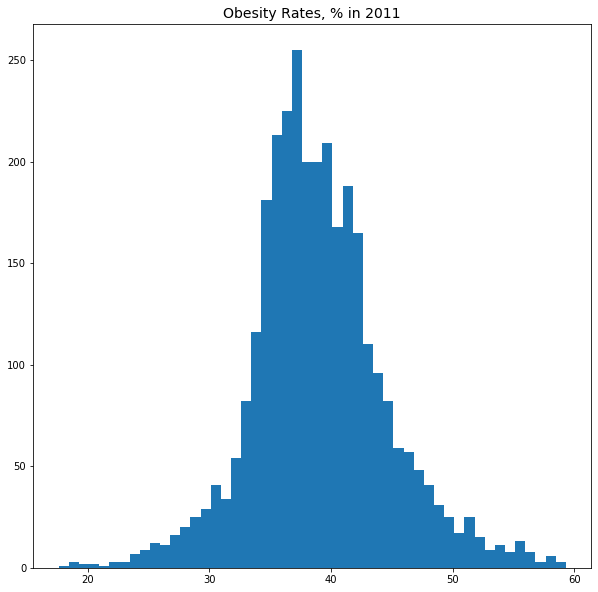

In [41]:
plt.figure(figsize=(10,10))
plt.hist(df_obesity['Female obesity prevalence, 2011* (%)'],bins=50, )
plt.title('Obesity Rates, % in 2011', size = 14);

This graph is a distribution of obesity rates among all the states. The obesity rates span from less than 20 to almost 60 percent obese in the state. The state with the highest obesity rate is Alabam and the lowest was connecticut and colorado. 

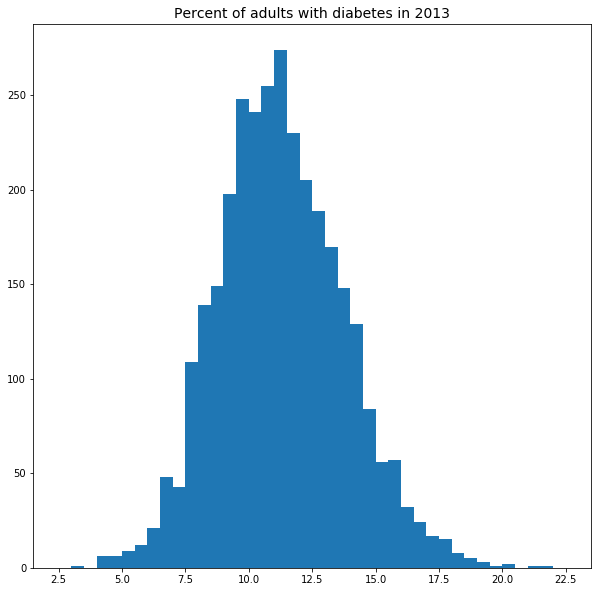

In [42]:
plt.figure(figsize=(10,10))
bins_list = [2.5,3,3.5,4, 4.5, 5,5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15,15.5, 16,16.5, 17, 17.5,18,18.5,19, 19.5, 20, 20.5,21, 21.5, 22, 22.5]
plt.hist(health['PCT_DIABETES_ADULTS13'],bins=bins_list)
plt.title('Percent of adults with diabetes in 2013', size = 14);

This graph is a distribution the percent of adults with diabetes. The diabeted rates span from less than 5 to over 22 percent. 

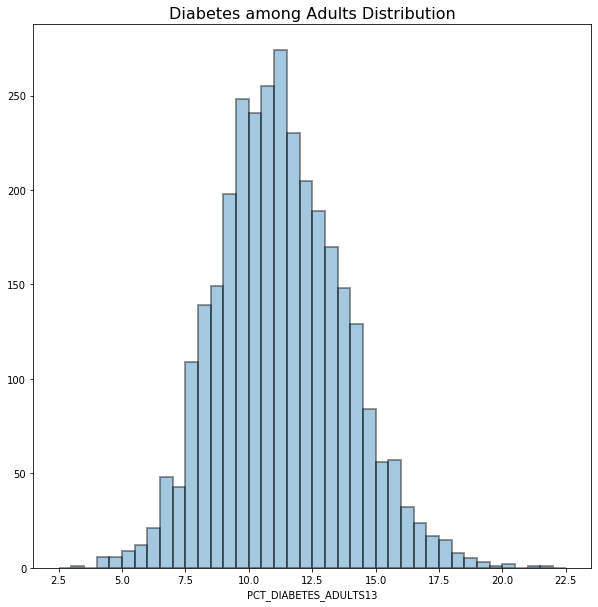

In [43]:
plt.figure(figsize=(10,10))
bins_list = [2.5,3,3.5,4, 4.5, 5,5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15,15.5, 16,16.5, 17, 17.5,18,18.5,19, 19.5, 20, 20.5,21, 21.5, 22, 22.5]
sns.distplot(health['PCT_DIABETES_ADULTS13'], kde = False, bins = bins_list,hist_kws=dict(edgecolor="k", linewidth=2))
#plt.yticks(ticks = )
#plt.xlabel('Percent of Diabetic Adults') 
#plt.ylabel('Counts')
plt.title('Diabetes among Adults Distribution', fontsize = 16);

This graph is a distribution of diabetes rates among all the states. The obesity rates span from less than 3 to over 22.5 percent obese in the state. The state with the highest obesity rate is Alabam and the lowest was connecticut and colorado. 

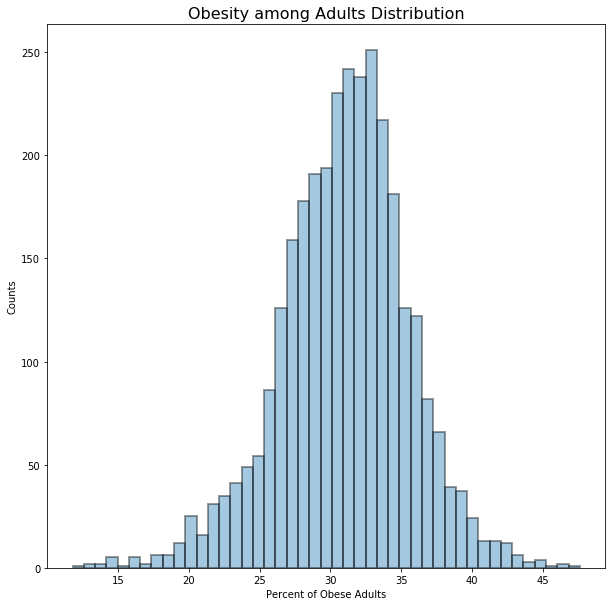

In [44]:
plt.figure(figsize=(10,10))
#fix bins
sns.distplot(health['PCT_OBESE_ADULTS13'], kde = False, bins =45,hist_kws=dict(edgecolor="k", linewidth=2))
#plt.yticks(ticks = )
plt.xlabel('Percent of Obese Adults') 
plt.ylabel('Counts')
plt.title('Obesity among Adults Distribution', fontsize = 16);

This graph is a distribution of obesity rates among all the states. The obesity rates span from less than 15 to over 50 percent obese in the state. The state with the highest obesity rate is Alabam and the lowest was connecticut and colorado. 

In [45]:
group_df = health.groupby('State')[['PCT_OBESE_ADULTS13']].agg(lambda x:x.mean())

In [46]:
top_avg_obesity_rates = group_df.head(5)

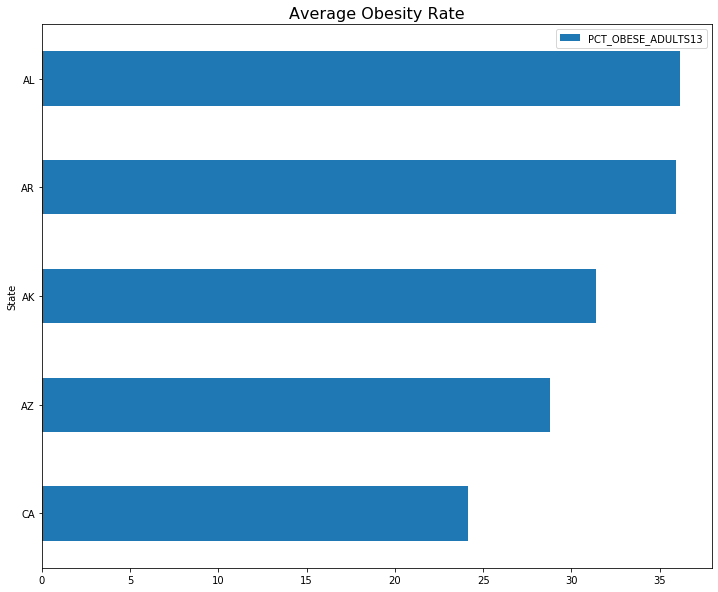

In [47]:
top_avg_obesity_rates.sort_values( by = 'PCT_OBESE_ADULTS13').plot(kind='barh', figsize=(12, 10)),
plt.xlabel='Average Obesity Rate' 
plt.ylabel='State'
plt.title('Average Obesity Rate', fontsize = 16);

This graph shows the top five states with the highest average obesity rate. Alabama, Arkansas and Alaska have the highest average obesity rate. 

In [48]:
group_df_D = health.groupby('State')[['PCT_DIABETES_ADULTS13']].agg(lambda x:x.mean())

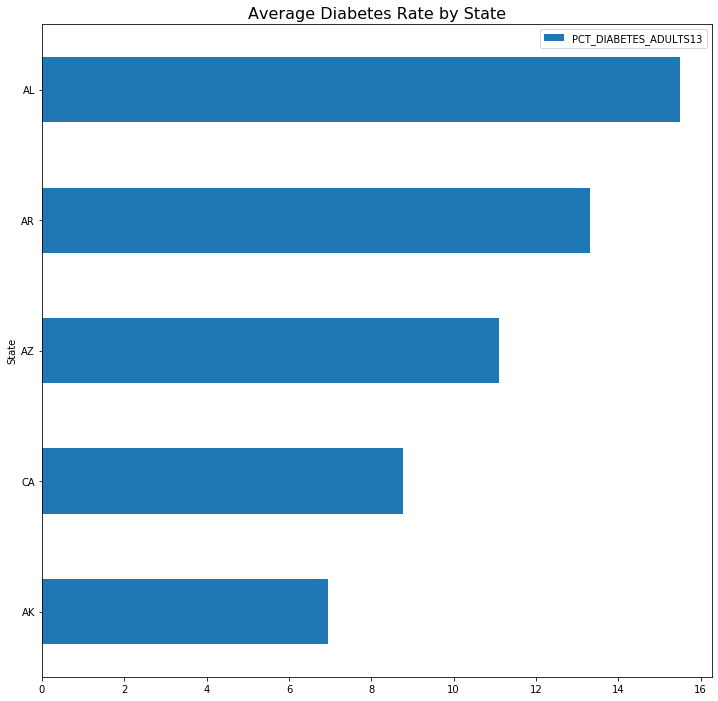

In [49]:
group_df_D.head().sort_values(by = 'PCT_DIABETES_ADULTS13').plot(kind='barh',figsize=(12, 12) )
plt.xlabel='Average Diabetes Rate' 
plt.ylabel='State'
plt.title('Average Diabetes Rate by State', fontsize = 16);

Alabama, Arkansas and Alabama have the highest mean Diabetes rate. 

## Merging the Datasets

We combined data from the health, life expectancy, obesity, aceess and local excel sheets and dropped any rows with more than 100 null values and focused the target to be obesity rated in 2013

In [50]:
from functools import reduce

In [51]:
#https://stackoverflow.com/questions/38978214/merge-a-list-of-dataframes-to-create-one-dataframe
df_list = [health, acess, acess_stores, local]

In [52]:
df = reduce(lambda left,right: pd.merge(left,right), df_list)

In [53]:
df.index=df.FIPS

In [54]:
df.columns

Index(['FIPS', 'State', 'County', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'RECFAC14', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15',

In [55]:
#checking for nulls
df.isnull().sum()

FIPS                         0
State                        0
County                       0
PCT_DIABETES_ADULTS08        0
PCT_DIABETES_ADULTS13        0
PCT_OBESE_ADULTS08           0
PCT_OBESE_ADULTS13           0
RECFAC09                     0
RECFAC14                     0
LACCESS_POP10                0
LACCESS_POP15                0
PCH_LACCESS_POP_10_15        0
PCT_LACCESS_POP10            0
PCT_LACCESS_POP15            0
LACCESS_LOWI10               0
LACCESS_LOWI15               0
PCH_LACCESS_LOWI_10_15       0
PCT_LACCESS_LOWI10           0
PCT_LACCESS_LOWI15           0
LACCESS_HHNV10               0
LACCESS_HHNV15               0
PCH_LACCESS_HHNV_10_15       0
PCT_LACCESS_HHNV10           0
PCT_LACCESS_HHNV15           0
LACCESS_SNAP15               0
PCT_LACCESS_SNAP15           0
LACCESS_CHILD10              0
LACCESS_CHILD15              0
LACCESS_CHILD_10_15          0
PCT_LACCESS_CHILD10          0
PCT_LACCESS_CHILD15          0
LACCESS_SENIORS10            0
LACCESS_

In [56]:
df.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,RECFAC09,RECFAC14,LACCESS_POP10,...,WICSPTH12,PCH_WICSPTH_08_12,GHVEG_FARMS07,GHVEG_FARMS12,CSA07,VEG_FARMS07,VEG_FARMS12,FMRKT09,PCT_LOCLFARM07,PCT_LOCLFARM12
FIPS,,,,,,,,,,,,,,,,,,,,,
1001,1001,AL,Autauga,11.4,13.0,31.5,34.1,4,5,18428.439685,...,0.090067,-24.412460,0.0,0.0,2.0,34.0,45.0,2.0,6.024096,13.110540
1003,1003,AL,Baldwin,9.8,10.4,26.2,27.4,18,25,35210.814078,...,0.141517,-0.252126,0.0,4.0,13.0,51.0,50.0,4.0,7.023705,10.414560
1005,1005,AL,Barbour,13.6,18.4,37.6,44.4,1,0,5722.305602,...,0.257344,27.968330,0.0,0.0,1.0,11.0,7.0,2.0,2.889246,2.276708
1007,1007,AL,Bibb,11.1,14.8,32.3,40.3,1,1,1044.867327,...,0.221268,-20.383970,0.0,2.0,2.0,10.0,11.0,1.0,5.687204,6.878307
1009,1009,AL,Blount,11.4,14.1,31.9,34.6,3,3,1548.175559,...,0.103760,-40.033200,2.0,0.0,7.0,67.0,64.0,1.0,5.940594,7.091056


# Cleaning the Merged Dataset

We removed any columns that included the year past 2013 since the target for this analysis is 2013. We also cleaned up the names of the columns

In [57]:
#predicting the 13 obesity rate, drop year after
col_list = [col for col in df.columns if '15' in col]
df.drop(col_list, axis=1, inplace=True)

In [58]:
#dropping 2014 data
col_list_2 = [col for col in df.columns if '14' in col]
df.drop(col_list_2, axis=1, inplace=True)

In [59]:
#dropping 2013 data
col_list_3 = [col for col in df.columns if '16' in col]
df.drop(col_list_3, axis=1, inplace=True)

We looked at count of grocery stores and convenience stores to see if there is a correlation with the states with the highest number of stores and the state with the lowest obesity rates.

In [60]:
group_df_conv = df.groupby('State')[['CONVS09']].agg(lambda x:x.value_counts().index[0])
group_df_groc = df.groupby('State')[['GROC09']].agg(lambda x:x.value_counts().index[0])
group_df_rec = df.groupby('State')[['RECFAC09']].agg(lambda x:x.value_counts().index[0])
group_df_obesity = df.groupby('State')[['PCT_OBESE_ADULTS13']].agg(lambda x:x.mean())

<Figure size 720x720 with 0 Axes>

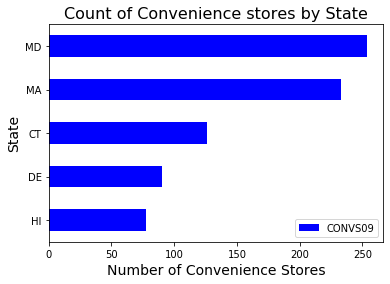

In [61]:
plt.figure(figsize=(10,10))
ax = group_df_conv.sort_values(by='CONVS09', ascending=False).head().plot(kind='barh', color='blue')
plt.title("Feature Multicollinearity")
ax.invert_yaxis()
ax.set_ylabel('State', fontsize = 14)
ax.set_xlabel('Number of Convenience Stores', fontsize = 14)
plt.title('Count of Convenience stores by State', fontsize = 16);

Massachusetts is again among the state with the highest number of convenience stores. 

<Figure size 720x720 with 0 Axes>

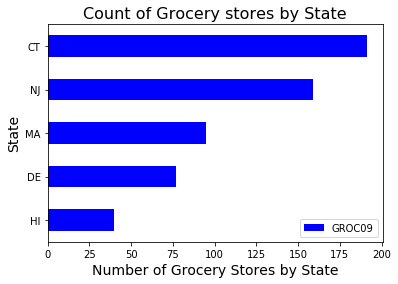

In [62]:
plt.figure(figsize=(10,10))
ax = group_df_groc.sort_values(by='GROC09', ascending=False).head().plot(kind='barh', color='blue')
ax.set_ylabel('State', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Number of Grocery Stores by State', fontsize = 14)
plt.title('Count of Grocery stores by State', fontsize = 16);

Connecticut, NJ, Massachusets, Delaware and Hawaii have the highest number of stores.

<Figure size 720x720 with 0 Axes>

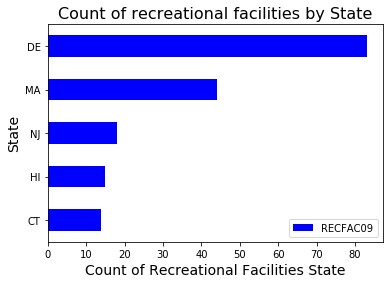

In [63]:
plt.figure(figsize=(10,10))
ax = group_df_rec.sort_values(by='RECFAC09', ascending=False).head().plot(kind='barh', color='blue')
ax.set_ylabel('State', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Count of Recreational Facilities State', fontsize = 14)
plt.title('Count of recreational facilities by State', fontsize = 16);

Delaware has the highest number of recreational facilities however not in the top five of states with the lowest obesity rate.

<Figure size 720x720 with 0 Axes>

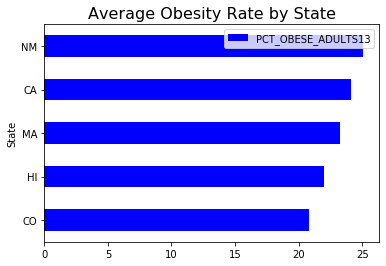

In [64]:
plt.figure(figsize=(10,10))
group_df_obesity.sort_values(by='PCT_OBESE_ADULTS13', ascending=True).head().plot(kind='barh', color='blue')
ax.set_ylabel('State', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Average Obesity Rate ', fontsize = 14)
plt.title('Average Obesity Rate by State', fontsize = 16);

Massuchestts has the highest number of stores and the lowest average obesity rates

In [65]:
group_df_conv = df.groupby('County')[['CONVS09']].agg(lambda x:x.value_counts().index[0])
group_df_groc = df.groupby('County')[['GROC09']].agg(lambda x:x.value_counts().index[0])
group_df_rec = df.groupby('County')[['RECFAC09']].agg(lambda x:x.value_counts().index[0])
group_df_obesity = df.groupby('County')[['PCT_OBESE_ADULTS13']].agg(lambda x:x.mean())

<Figure size 720x720 with 0 Axes>

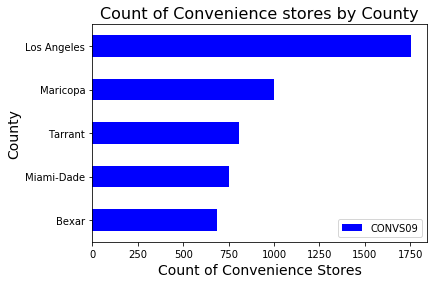

In [66]:
plt.figure(figsize=(10,10))
ax = group_df_conv.sort_values(by='CONVS09', ascending=False).head().plot(kind='barh', color='blue');
ax.set_ylabel('County', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Count of Convenience Stores', fontsize = 14)
plt.title('Count of Convenience stores by County', fontsize = 16);

Maricopa county is in Arizona, Tarrant county is in Texas, Miami-Dade is in Florida and Bexar is in Texas. All of those counties also have the highest average obesity rate. This shows how an increase in the number of convenience stores could result in an increase in the obesity rate. 

<Figure size 720x720 with 0 Axes>

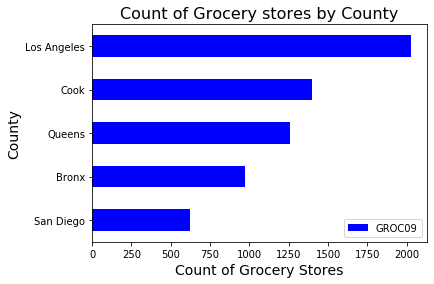

In [67]:
plt.figure(figsize=(10,10))
ax = group_df_groc.sort_values(by='GROC09', ascending=False).head().plot(kind='barh', color='blue');
ax.set_ylabel('County', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Count of Grocery Stores', fontsize = 14)
plt.title('Count of Grocery stores by County', fontsize = 16);

Counties in New York and California have the highest number of grocery stores. 

<Figure size 720x720 with 0 Axes>

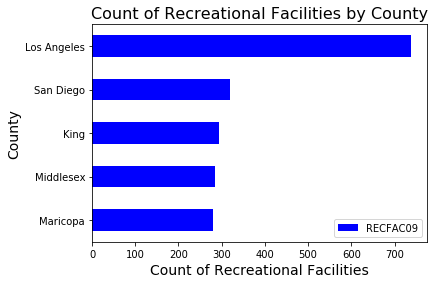

In [68]:
plt.figure(figsize=(10,10))
ax = group_df_rec.sort_values(by='RECFAC09', ascending=False).head().plot(kind='barh', color='blue');
ax.set_ylabel('County', fontsize = 14)
ax.invert_yaxis()
ax.set_xlabel('Count of Recreational Facilities', fontsize = 14)
plt.title('Count of Recreational Facilities by County', fontsize = 16);

When loocking at the count the recreational facilities, 

In [69]:
df.to_csv('../Data/df.csv')